# SVC and XGBoost

This is the second file of the code (first part, in a seperate file stateFarmEx5_modelTuning, 
was about model tuning and feature selection) which obtains predictions from models.

The following two machine learning classification models are implemented in this code:
1. Suppurt Vector Classifier (SVC), and
2. Extreme Gradient Boosting (XGBoost) classifier.

Data cleaning (imputing, encoding, and standardization), 
prediction from model using training data, and finally 
prediction from model using test data are demonstrated.

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore') # suppress warnings


# Display options to see large number of row and columns instead of 
# default value 60 (first 30 and last 30)
pd.set_option("max_info_columns", 110)
pd.options.display.max_columns = 110
pd.set_option("max_info_rows", 1000)
pd.options.display.max_rows = 1000

In [2]:
# Import data

train = pd.read_csv('exercise_05_train.csv',sep=',')
test = pd.read_csv('exercise_05_test.csv',sep=',')
#train = pd.read_csv('exercise_05_train.csv',sep=',')
#test = pd.read_csv('exercise_05_test.csv',sep=',')

print(train.shape) # Find number of (rows, columns)
print(test.shape)
print(train.size,", ", test.size) # size of train and test data (in bytes)
train.head(6)

(40000, 101)
(10000, 100)
4040000 ,  1000000


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.963686,6.627185,-45.224008,9.477531,-3.216532,13.216874,9.754747,5.245851,-1.102918,-2.867482,-37.632285,-12.983484,-30.244259,0.293407,-4.808540,9.293345,1.646353,5.687031,-14.049164,-1.158595,-20.776226,-0.789881,-39.396519,1.235763,-5.403411,-0.012328,0.703963,-22.946374,0.114717,-1.108137,-7.513845,1.278470,-3.606321,1.615670,chrystler,thur,-1.774488,8.804852,2.136329,2.501032,-6.011242,$-865.28,-32.366234,-27.950057,-5.662614,0.02%,-4.820389,26.350661,-17.522879,14.420626,-68.076453,-47.173300,0.954900,-3.708620,4.131492,8.424414,42.155760,-0.772753,-40.332336,4.748333,-9.002899,7.083087,-12.264477,8.626495,0.065363,-0.124457,21.750625,-5.282121,sept.,6.153703,-6.272020,17.255821,5.782086,15.141420,33.884019,-2.389519,-1.766949,-17.897092,3.736479,40.082477,16.640042,1.680384,0.373888,-13.562891,13.158882,2.289092,-3.881315,-15.959124,2.940515,-2.555928,-37.601994,0.988829,0.313772,asia,1.380664,-16.388994,5.326730,4.187294,0.045549,-3.646841,0
1,-1.770062,-23.610459,-0.964003,-31.981497,-10.294599,-10.240251,-1.518888,-1.675208,0.498134,-0.614390,47.652135,6.567264,-30.410216,-1.301751,-6.042590,1.817864,4.379207,5.676816,-37.757544,2.164646,59.052864,-1.480575,-35.736992,-8.580044,4.206910,0.732038,-1.109053,15.986872,-0.534066,5.795439,-2.556791,2.990327,-1.603091,0.633938,volkswagon,thur,0.040507,6.645667,3.205207,3.567783,5.405315,$325.27,-58.117719,-49.488582,-50.291610,-0.01%,1.003284,10.761073,-16.411092,2.474421,-24.002610,7.760549,-0.167079,-5.148356,8.422932,2.882336,47.178502,-0.166740,-36.199657,-0.231633,-2.334688,-4.212509,1.039474,-7.251746,0.661180,-7.073426,-36.774709,-11.458640,July,10.030685,0.918319,-38.648511,-24.077239,16.991279,19.847963,1.106517,6.949901,15.688587,4.610910,-15.223066,4.880278,6.029540,-0.506606,-16.914889,-8.219612,1.639064,7.030400,-11.601869,-4.907436,-6.075066,-27.168761,-2.162863,1.809807,asia,2.500590,4.338834,-1.583225,-1.172417,0.011216,0.097180,0
2,9.962401,-8.349849,23.248891,-24.196879,8.937480,10.965000,-7.490596,-3.025094,0.595807,0.382732,5.629537,3.769767,17.623199,-0.396468,-10.022546,1.158419,12.353464,0.398796,-0.201112,-5.803935,7.104037,2.393360,-30.622601,-12.318385,-6.341881,-0.055468,-1.176393,-13.288725,-0.383693,0.122918,-4.791641,-10.250248,5.837668,-3.756878,bmw,thurday,0.448073,-2.639292,-1.940933,-11.196415,-7.971329,$743.91,-47.325525,17.089850,-20.998601,0.0%,1.270592,20.947667,-1.198462,-1.228983,-16.860396,62.630162,-0.520845,-0.484470,-16.271894,-11.448579,-5.907019,0.627614,-13.539267,2.706494,17.375989,-2.434721,-1.433001,7.734776,0.489224,0.535575,2.491412,-9.652969,July,16.090371,0.180281,10.326921,-12.845434,19.811216,-44.341947,-0.513749,-1.495533,3.605778,0.480531,39.328247,-19.626495,9.321199,1.036403,19.435797,-7.605212,-3.937989,3.702377,-2.246263,1.441523,-5.642358,-90.377656,1.779660,9.528113,asia,1.396475,7.839188,10.402396,1.288991,0.008209,-4.132316,0
3,-5.780709,-25.261584,1.383115,-11.786929,7.993078,-11.245752,-2.607351,-3.513896,-0.614235,-1.453979,-2.636676,-3.595789,-19.648688,0.393391,-3.470142,0.102685,-0.882429,-1.598535,12.869959,5.374145,30.723272,4.541173,-59.270400,-0.101281,4.451334,0.650121,-1.154275,-19.434740,1.471404,9.678197,4.149206,-2.814893,-10.966831,6.516250,nissan,thurday,-0.625046,1.918934,1.046202,-6.727565,8.522306,$538.48,-36.489186,3.120606,-31.523483,0.01%,12.551744,0.908244,-8.868663,-37.101607,40.757401,-22.994817,0.532649,4.227293,6.650745,-0.398449,-9.192991,-0.935667,-61.343401,-14.767857,9.686716,5.354954,0.002768,9.552721,-4.347074,1.513008,14.245827,1.555428,July,10.215072,5.658302,-39.728801,-22.905705,34

In [3]:
# Impute both data (training and test data): impute numeric data by the column median value, 
# and impute categorical data by maximum occurring element (column mode).
# https://www.kaggle.com/cbrogan/xgboost-example-python

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X], 
            # The symbol O in np.dtype('O') is capital letter O as in Object.
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
#
train = DataFrameImputer().fit_transform(train) # train data now has no missing data (both numeric and categorical)
test = DataFrameImputer().fit_transform(test) # test data now has no missing data (both numeric and categorical)

In [4]:
print(train.isnull().values.sum())
print(test.isnull().values.sum())
# Now we don't have any missing data in both training data and test data.
# The missing data problem is now cured.

0
0


In [5]:
# Now we gear toward converting categorical varibles into numeric form. We need this
# since the machine learing modules, we will be using, use only numeric data.

# For training data
train['x41'] = train.x41.apply(lambda x: x.replace('$','')) # remove $ sign in x41 variable
train['x45'] = train.x45.apply(lambda x: x.replace('%','')) # remove % sign in x45 variable
# Convert them to float so that we can standardize them
train['x41'] = train['x41'].astype(float)
train['x45'] = train['x45'].astype(float)

# For test data
test['x41'] = test.x41.apply(lambda x: x.replace('$',''))
test['x45'] = test.x45.apply(lambda x: x.replace('%',''))
# Convert them to float so that we can standardize them
test['x41'] = test['x41'].astype('float')
test['x45'] = test['x45'].astype('float')

In [6]:
# Convert categorical variables in numeric form (float) 
# which is needed for classification models we will use later.
from sklearn import preprocessing
num = preprocessing.LabelEncoder()
num.fit(["Honda","Toyota","bmw","chevrolet","chrystler","ford","mercades","nissan","tesla","volkswagon"])
train["x34"] = num.transform(train["x34"]).astype('float')
test["x34"] = num.transform(test["x34"]).astype('float')

train = train.replace(to_replace="wed", value="wednesday")
train = train.replace(to_replace="thur", value="thurday")
train = train.replace(to_replace="fri", value="friday")

test = test.replace(to_replace="wed", value="wednesday")
test = test.replace(to_replace="thur", value="thurday")
test = test.replace(to_replace="fri", value="friday")

num.fit(["friday","monday","thurday","tuesday","wednesday"])

train["x35"] = num.transform(train["x35"]).astype('float')
test["x35"] = num.transform(test["x35"]).astype('float')

num.fit(["Apr","Aug","Dev","Feb","January","July","Jun","Mar","May","Nov","Oct","sept."])
train["x68"] = num.transform(train["x68"]).astype('float')
test["x68"] = num.transform(test["x68"]).astype('float')

num.fit(["america","asia","euorpe"])
train["x93"] = num.transform(train["x93"]).astype('float') 
test["x93"] = num.transform(test["x93"]).astype('float') 

#train[["x34","x35","x68","x93"]].dtypes

In [7]:
# Drop features that are not important for model prediction. These features were found from the first file 
# which utilized recursive feature elimination by using RFE package of sklearn.
X = train.drop(['y','x6','x7','x9','x11',
                'x13','x14','x15','x16','x17','x18','x20','x23',
                'x24','x26','x28','x29','x30','x31','x32','x34',
                'x36','x38','x39','x42','x46',
                'x48','x52','x54','x55','x59',
                'x60','x61','x62','x64','x65','x67','x68',
                'x76','x77','x81','x82',
                'x84','x86','x87','x88','x89','x91','x92','x93','x94',
                'x98'] ,axis=1)
test = test.drop(['x6','x7','x9','x11',
                'x13','x14','x15','x16','x17','x18','x20','x23',
                'x24','x26','x28','x29','x30','x31','x32','x34',
                'x36','x38','x39','x42','x46',
                'x48','x52','x54','x55','x59',
                'x60','x61','x62','x64','x65','x67','x68',
                'x76','x77','x81','x82',
                'x84','x86','x87','x88','x89','x91','x92','x93','x94',
                'x98'] ,axis=1)
Y = train['y']

from sklearn.metrics import f1_score,classification_report,accuracy_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split training data in training and validation samples: 30% validation, 70% training samples
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.30, random_state = 42)

# find out rows and columns of X_train and X_valid
print('Training Data Shape:', X_train.shape)
print('validation data shape: ', X_valid.shape)

Training Data Shape: (28000, 49)
validation data shape:  (12000, 49)


In [8]:
# Standardize the features of trianing/validation/test data (with mean=0 and standard deviation=1) so that
# all of them are uniformly evaluated. Since the range of values of raw data varies widely, 
# in some machine learning algorithms, objective functions will not work properly without normalization. 
# For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. 
# If one of the features has a broad range of values, the distance will be governed by this particular feature. 
# Therefore, the range of all features should be normalized so that each feature contributes approximately 
# proportionately to the final distance.

from sklearn import preprocessing 
X_train = preprocessing.scale(X_train) # scale training data
X_valid = preprocessing.scale(X_valid) # scale validation data
test = preprocessing.scale(test)       # Scale the test data
print(X_train.shape)
print(X_valid.shape)
print(test.shape)

(28000, 49)
(12000, 49)
(10000, 49)


# Extreme Gradient Boosting (XGBoost)

Now we are ready to obtain XGBoost model prediction.

Extrame Gradient Boosting (XGBoost) classification:
XGBoost is an implementation of gradient boosting decision trees designed for speed 
and performance which is dominatively competitive machine learning algorithm. 
XGBoost internally has parameters for cross-validation, regularization, 
user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.

What is boosting?
Boosting is a sequential technique which works on the principle of an ensemble. 
It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, 
the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted 
correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a 
weak learner is one which is slightly better than the random guessing, for example, 
a decision tree whose predictions are slightly better than 50%.

Model Prediction (after removing 51 features using recursive feature elimination by RFE package of sklearn).

In [9]:
import datetime
st = datetime.datetime.now() # start time
print("start time: ", st)


import xgboost as xgb
from xgboost.sklearn import XGBClassifier  

xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.2,
       max_delta_step=0, max_depth=7, min_child_weight=7, missing=None,
       n_estimators=300, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

xgb_model.fit(X_train, y_train) 

# Prediction from training data
xgb_prediction = xgb_model.predict(X_valid)

# Print confusion matrix
print(metrics.confusion_matrix(y_valid,xgb_prediction))
# Pring classification report
print("\nclassification_report\n", classification_report(y_valid, xgb_prediction))
# Pring AUC score
print("AUC score: ", roc_auc_score(y_valid, xgb_prediction))
# Print the accuracy score
print("\nThe overall accuracy score: ", metrics.accuracy_score(y_valid,xgb_prediction))

nd = datetime.datetime.now() # end time 
print("\nCode run-time: ", nd-st)

start time:  2019-08-26 18:22:14.439545
[[9486   54]
 [ 220 2240]]

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9540
           1       0.98      0.91      0.94      2460

   micro avg       0.98      0.98      0.98     12000
   macro avg       0.98      0.95      0.96     12000
weighted avg       0.98      0.98      0.98     12000

AUC score:  0.9524543641662832

The overall accuracy score:  0.9771666666666666

Code run-time:  0:00:55.534118


In [10]:
# Prediction from test data
xgb_predictionTest = xgb_model.predict(test)

# Find class type 1's total predicted value (54+2240 from confusion matrix) in 12000 samples of validation data
print(np.sum(xgb_prediction))   

# Find class type 1's total predicted value in 10000 samples of test data
print(np.sum(xgb_predictionTest)) 

# Save predicted result from test.csv
xgb_predictionResult = pd.DataFrame(xgb_predictionTest,columns=[' ']).to_csv('result1.csv',index=0)

2294
1865


# Plot XGBoost decision tree

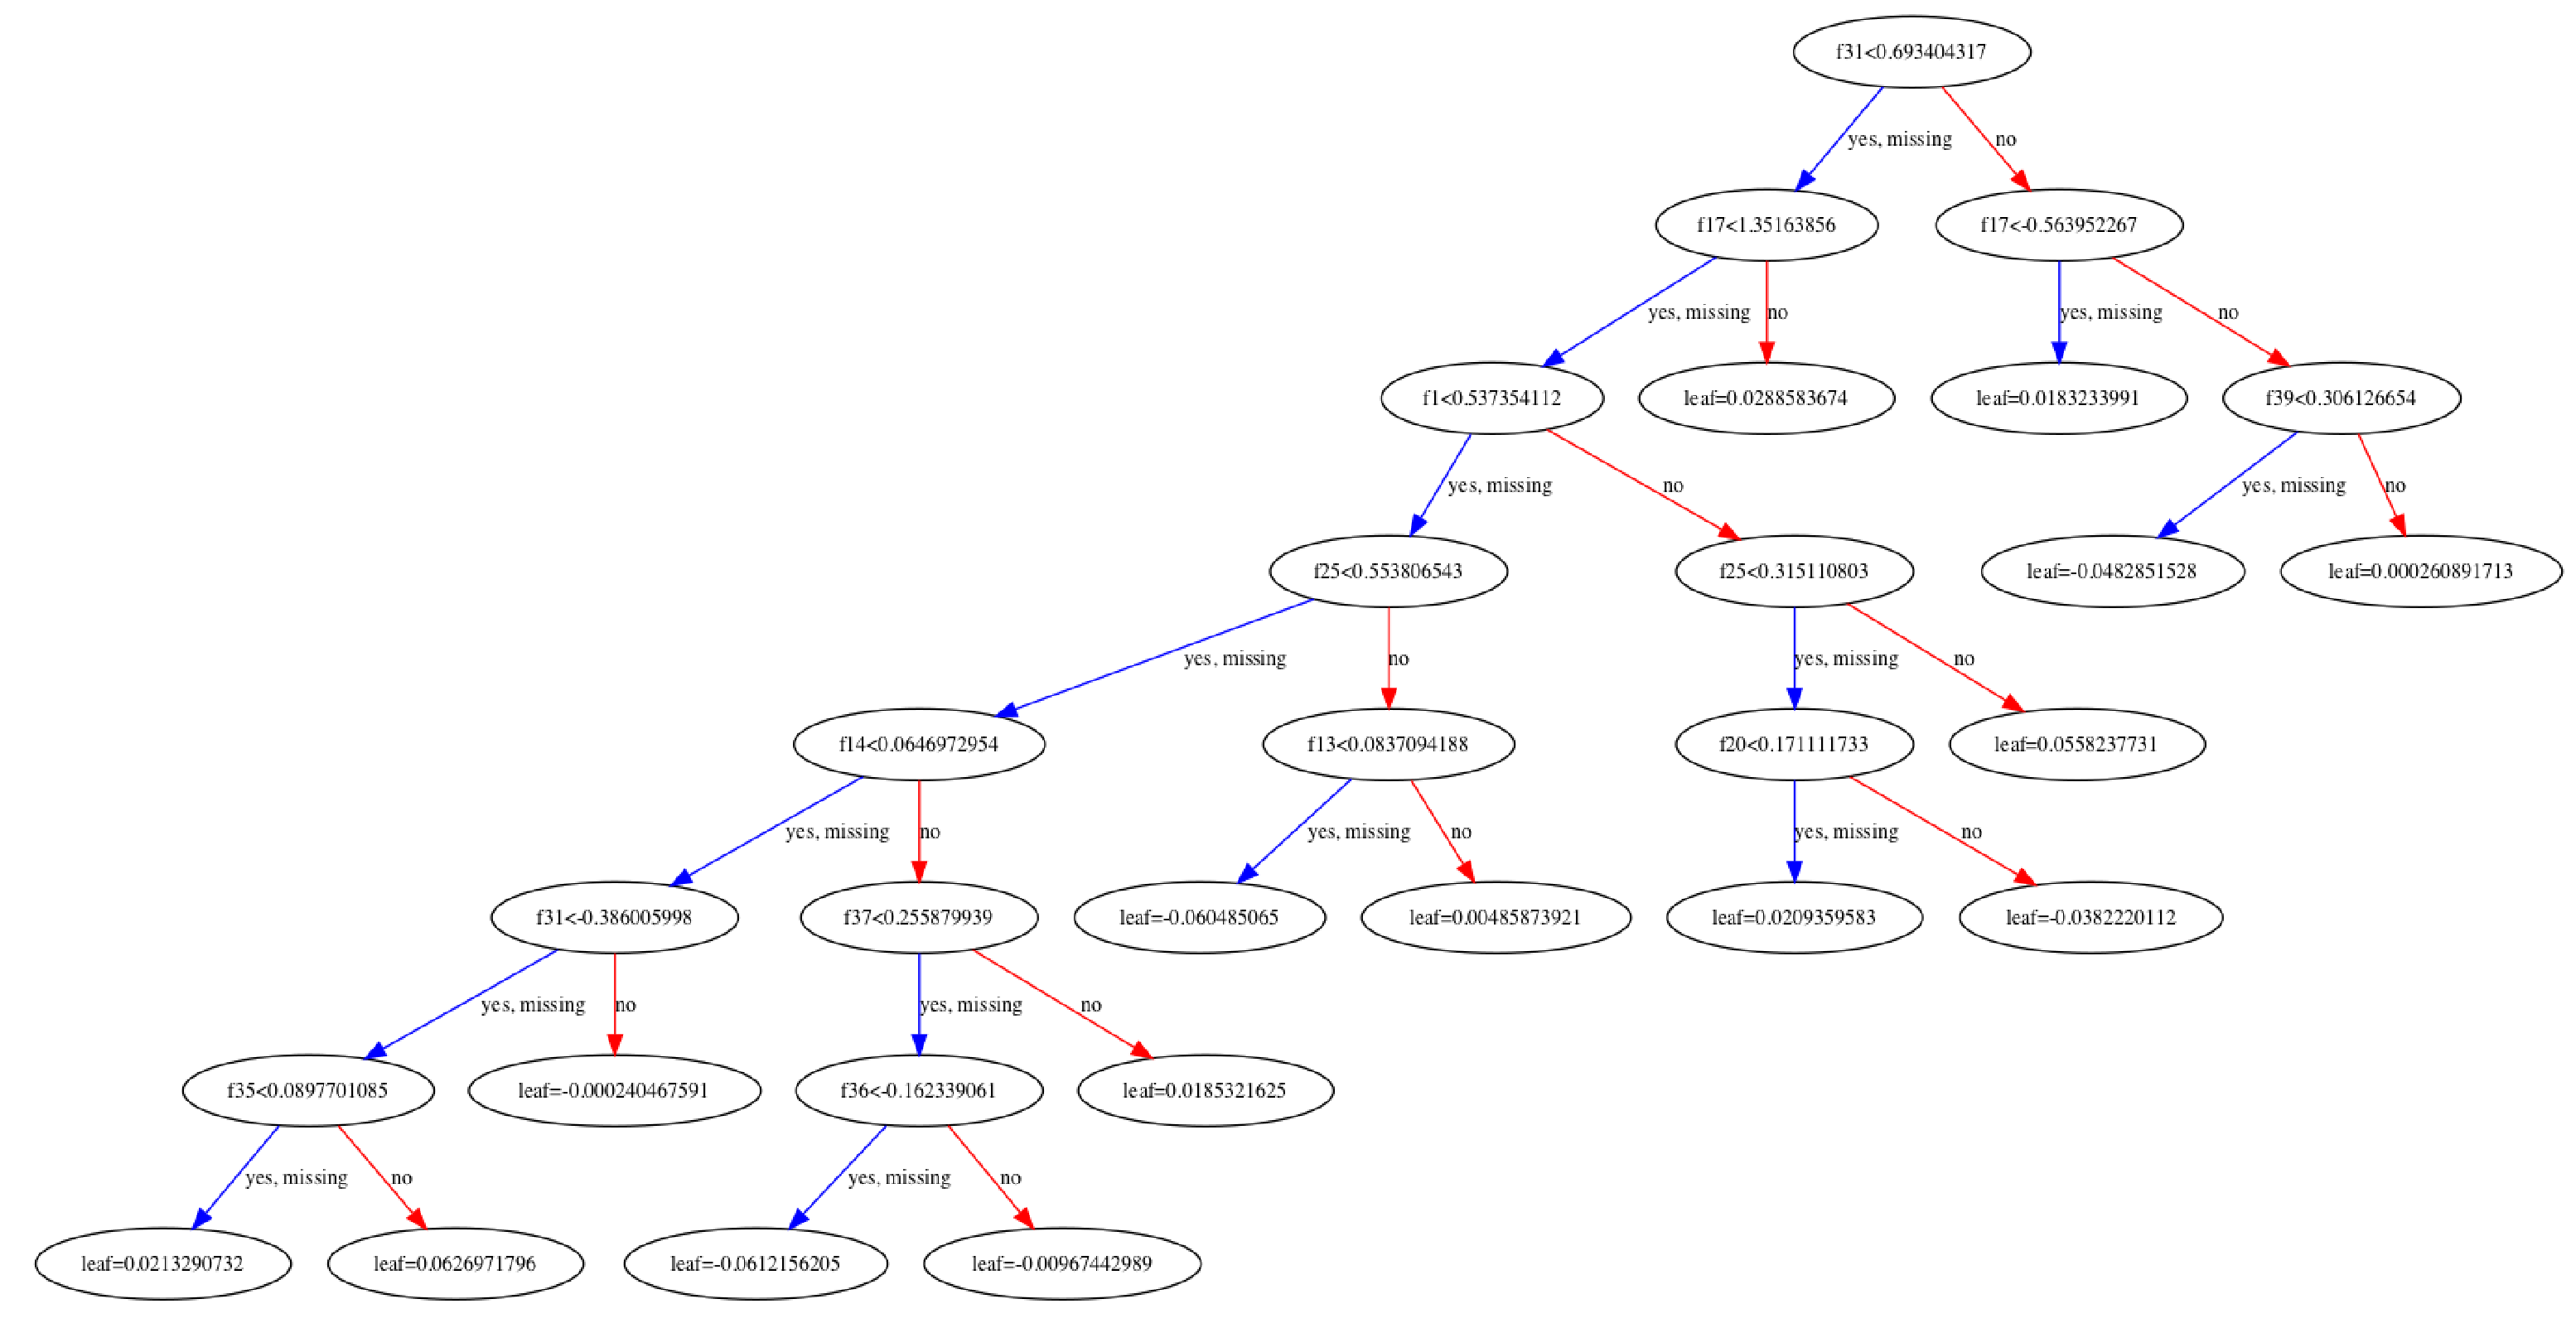

In [15]:
# The plotting needs to have graphviz installed: pip install graphviz in mac 
# (this installation command is not sufficient in windows)
from matplotlib import pyplot as plt
xgb.plot_tree(xgb_model, num_trees=299) # num_trees = 299 is the maximum value, because n_estimators = 300
plt.rcParams['figure.figsize'] = [60,40]
plt.show()

# support vector classifier (SVC)

In the support vector classifier (SVC) algorithm, each data item is plotted as a point in 
n-dimensional space (n being number of features - 100 in this analysis) with the value of 
each feature being the value of a particular coordinate. Then the classification is performed 
by finding a hyperplane that differentiates the two classes very well. SVC can be used in both 
supervised and unsupervised learnings - this analysis being supervised learning (known label). 
SVC is very effective when the number of features is very high compared to the number of data 
samples (rows) - hence it is very useful in text classification problems in natural language programming (NLP). 
In the current analysis, even when the number of features was 100 and number of rows were in thousands, 
SVC was still reasonable and gave the best result.

In [13]:
import datetime
st = datetime.datetime.now() # start time of running
print("started at: ",st)

from sklearn.svm import SVC

# Best parameters found: {'C': 100, 'kernel': 'rbf'}

svc_model = SVC(kernel='rbf', gamma='auto', C=100).fit(X_train,y_train)

# Get the confusion matrix from SVM
svc_prediction = svc_model.predict(X_valid)
print(metrics.confusion_matrix(y_valid, svc_prediction))
# Pring classification report
print("\nclassification_report", classification_report(y_valid, svc_prediction))
# Pring AUC score
print("AUC: ", roc_auc_score(y_valid, svc_prediction))
# Print the accuracy score
print("\nThe overall accuracy score: ", metrics.accuracy_score(y_valid, svc_prediction))

nd = datetime.datetime.now() # end time
print("\nCode run-time: ", nd-st) # code run time

started at:  2019-08-26 18:24:13.301481
[[9507   33]
 [  78 2382]]

classification_report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9540
           1       0.99      0.97      0.98      2460

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.99      0.98      0.99     12000
weighted avg       0.99      0.99      0.99     12000

AUC:  0.9824167817149869

The overall accuracy score:  0.99075

Code run-time:  0:00:53.261857


In [14]:
# Prediction from test data
svc_predictionTest = svc_model.predict(test)

# Find class type 1's total predicted value (33+2346 from confusion matrix) in 12000 samples of validation data
print(np.sum(svc_prediction))  

# Find class type 1's total predicted value in 10000 samples of test data  (2417, 1961)
print(np.sum(svc_predictionTest)) 

# Save predicted result from test.csv
svc_predictionTest = svc_model.predict(test)
predictionResult = pd.DataFrame(svc_predictionTest,columns=[' ']).to_csv('result2.csv',index=0)

2415
1959
